In [ ]:
import pandas as pd
ad = pd.read_csv('/content/eda1_admissionId.csv')
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79621 entries, 0 to 79620
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          79621 non-null  int64 
 1   race_general        79621 non-null  object
 2   gender              79621 non-null  object
 3   insurance           79621 non-null  object
 4   admission_id        79621 non-null  int64 
 5   age_at_admission    79621 non-null  int64 
 6   admission_type      79621 non-null  object
 7   admission_location  79621 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.9+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)  # Adjust width and height as needed
sns.set_style("whitegrid")  # Choose a style (e.g., 'whitegrid', 'darkgrid', 'ticks')
sns.set_palette("muted")  # Choose a color palette (e.g., 'bright', 'pastel', 'muted')


In [ ]:
la = pd.read_csv('/content/eda1_labId.csv')
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963246 entries, 0 to 963245
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   patient_id          963246 non-null  int64  
 1   race_general        963246 non-null  object 
 2   gender              963246 non-null  object 
 3   insurance           963246 non-null  object 
 4   admission_id        963246 non-null  int64  
 5   age_at_admission    963246 non-null  int64  
 6   admission_type      963246 non-null  object 
 7   admission_location  963246 non-null  object 
 8   lab_test_id         963246 non-null  int64  
 9   lab_test            963246 non-null  object 
 10  test_value          963246 non-null  float64
 11  test_unit           963246 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 88.2+ MB


In [ ]:
pi = pd.read_csv('/content/eda1_patientId.csv')
pi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19111 entries, 0 to 19110
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   patient_id    19111 non-null  int64 
 1   race_general  19111 non-null  object
 2   gender        19111 non-null  object
 3   insurance     19111 non-null  object
dtypes: int64(1), object(3)
memory usage: 597.3+ KB


In [ ]:
eda = pd.read_csv('/content/eda3.csv')
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78373 entries, 0 to 78372
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient ID             78373 non-null  int64  
 1   Admission ID           78373 non-null  int64  
 2   Insurance              78373 non-null  object 
 3   Admission Type         78373 non-null  object 
 4   Gender                 78373 non-null  object 
 5   Age                    78373 non-null  int64  
 6   Race                   78373 non-null  object 
 7   Length Of Stay (hour)  78373 non-null  int64  
 8   Age Group              78373 non-null  object 
 9   Admission Urgency      78373 non-null  int64  
 10  30 Day Readmission     78373 non-null  bool   
 11  Average Hemoglobin     78373 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 6.7+ MB


## Race

### The race distribution of patients

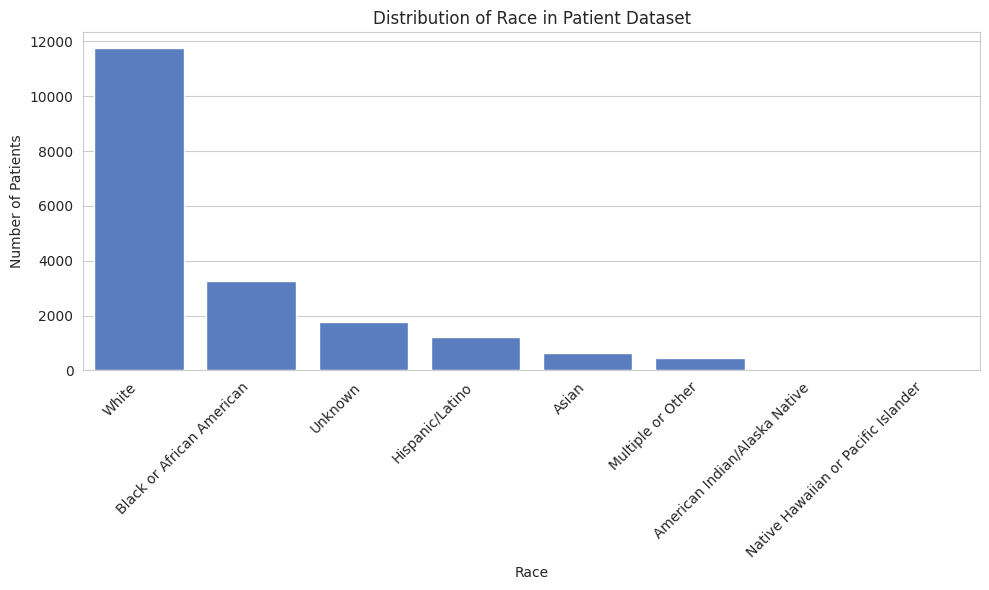

In [ ]:
race_counts = pi['race_general'].value_counts()
race_counts = race_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Distribution of Race in Patient Dataset')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### The average admission times by race

In [ ]:
#Count the corresponding admission_id for each patient_id and list their corresponding race group
patient_admission_race = ad.groupby(['patient_id', 'race_general'])['admission_id'].count().reset_index()

patient_admission_race = patient_admission_race.rename(columns={'admission_id': 'admission_count'})

print(patient_admission_race)

       patient_id               race_general  admission_count
0        10000980  Black or African American                7
1        10001176                      White                1
2        10001877                      White                2
3        10002013                    Unknown               15
4        10002976                      White                2
...           ...                        ...              ...
19106    19998350  Black or African American                2
19107    19998497                      White                6
19108    19998878                      White                6
19109    19999287                    Unknown                3
19110    19999379                      White                1

[19111 rows x 3 columns]


In [ ]:
#Count the corresponding admission_id for each patient_id and list their corresponding race group
patient_admission_race = ad.groupby(['patient_id', 'race_general'])['admission_id'].count().reset_index()

patient_admission_race = patient_admission_race.rename(columns={'admission_id': 'admission_count'})

print(patient_admission_race)

       patient_id               race_general  admission_count
0        10000980  Black or African American                7
1        10001176                      White                1
2        10001877                      White                2
3        10002013                    Unknown               15
4        10002976                      White                2
...           ...                        ...              ...
19106    19998350  Black or African American                2
19107    19998497                      White                6
19108    19998878                      White                6
19109    19999287                    Unknown                3
19110    19999379                      White                1

[19111 rows x 3 columns]


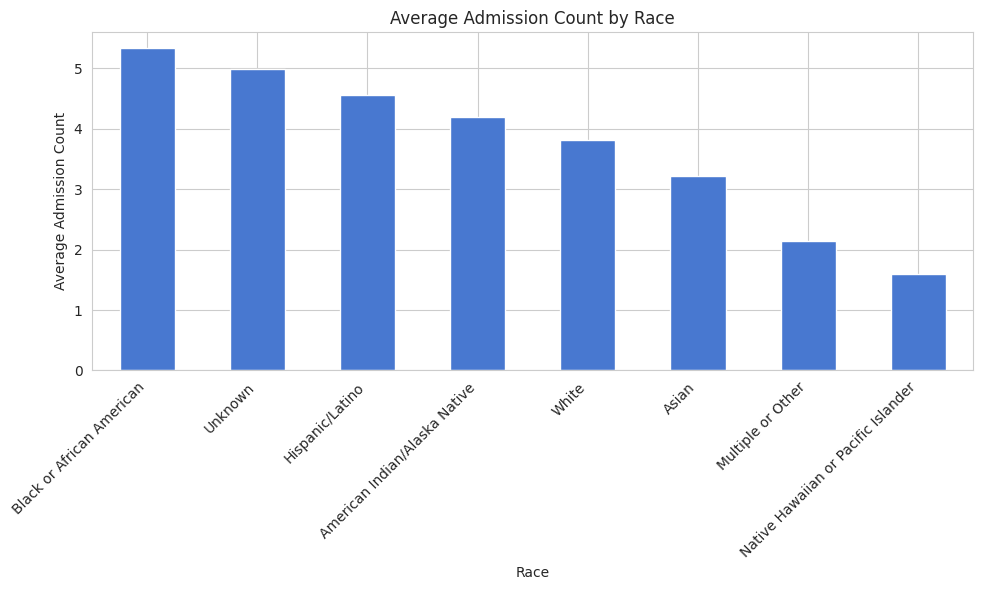

In [ ]:
#Plot the average admission of each race group
average_admission_by_race = patient_admission_race.groupby('race_general')['admission_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_admission_by_race.plot(kind='bar')
plt.title('Average Admission Count by Race')
plt.xlabel('Race')
plt.ylabel('Average Admission Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

# Calculate the number of patients admitted more than once for each race
readmitted_patients_by_race = patient_admission_race[patient_admission_race['admission_count'] > 1].groupby('race_general')['patient_id'].count()

# Calculate the total number of patients for each race
total_patients_by_race = pi['race_general'].value_counts()

# Create a DataFrame to store the results
readmission_table = pd.DataFrame({
    'Number of Patients Admitted Over 1 Time': readmitted_patients_by_race,
    'Total Number of Patients': total_patients_by_race
})

# Calculate the readmission rate
readmission_table['Readmission Rate'] = readmission_table['Number of Patients Admitted Over 1 Time'] / readmission_table['Total Number of Patients']

# Display the table
print(readmission_table)

                                     Number of Patients Admitted Over 1 Time  \
race_general                                                                   
American Indian/Alaska Native                                             17   
Asian                                                                    378   
Black or African American                                               2391   
Hispanic/Latino                                                          759   
Multiple or Other                                                        190   
Native Hawaiian or Pacific Islander                                        3   
Unknown                                                                 1251   
White                                                                   7621   

                                     Total Number of Patients  \
race_general                                                    
American Indian/Alaska Native                              31   
Asia

### The readmission rate by race

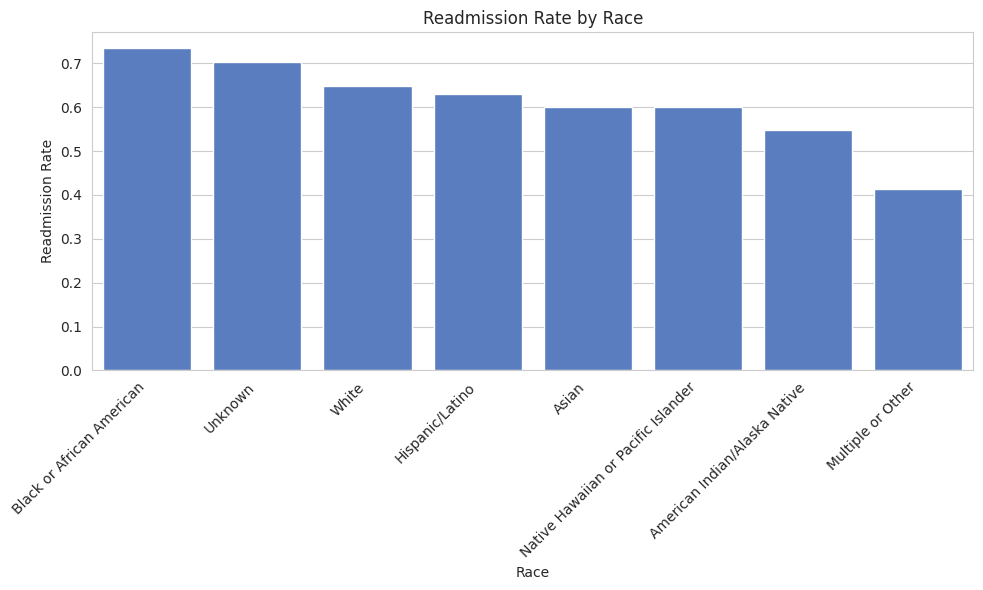

In [ ]:
# Sort the readmission rate in descending order
readmission_table_sorted = readmission_table.sort_values('Readmission Rate', ascending=False)

# Plot the readmission rate
plt.figure(figsize=(10, 6))
sns.barplot(x=readmission_table_sorted.index, y=readmission_table_sorted['Readmission Rate'])
plt.title('Readmission Rate by Race')
plt.xlabel('Race')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 30-Day readmission rate by race

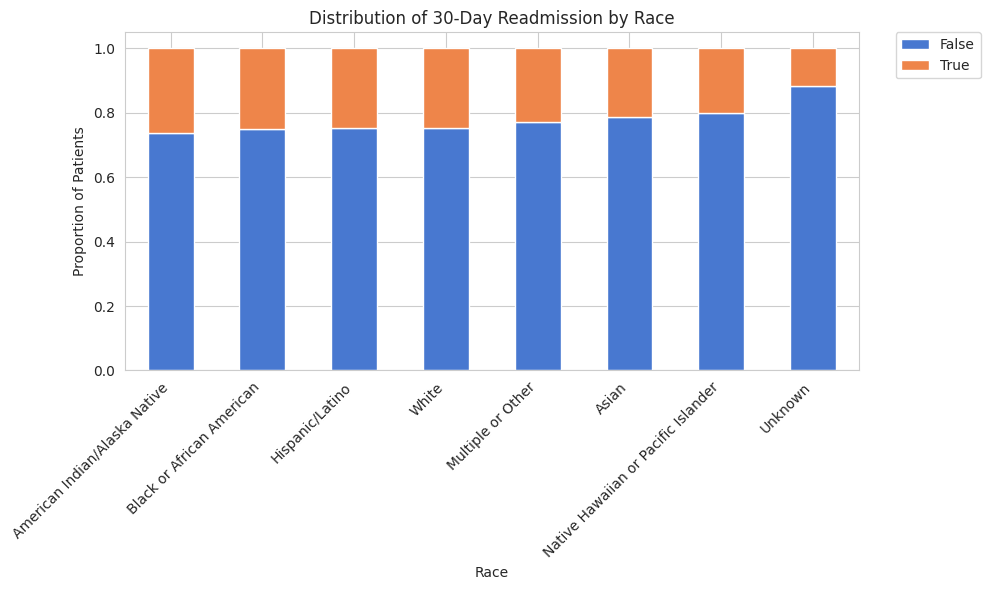

In [ ]:
# Group by race and calculate the distribution of '30_day_readmission'
readmission_by_race = eda.groupby('Race')['30 Day Readmission'].value_counts(normalize=True).unstack()
readmission_by_race = readmission_by_race.sort_values(True,ascending =False)
# Plot the distribution
readmission_by_race.plot(kind='bar', stacked=True)
plt.title('Distribution of 30-Day Readmission by Race')
plt.xlabel('Race')
plt.ylabel('Proportion of Patients')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [ ]:
readmission_by_race_count = eda.groupby('Race')['30 Day Readmission'].value_counts().unstack()
readmission_by_race_count

30 Day Readmission,False,True
Race,,
American Indian/Alaska Native,133,47
Asian,1748,477
Black or African American,13844,4619
Hispanic/Latino,4556,1499
Multiple or Other,1918,565
Native Hawaiian or Pacific Islander,24,6
Unknown,1231,162
White,35785,11759


## Gender

### Gender and race distribution of patients

In [ ]:
gender_by_patient = ad.groupby('gender')['patient_id'].nunique()

print(gender_by_patient)

gender
F     9050
M    10061
Name: patient_id, dtype: int64


<Figure size 1200x600 with 0 Axes>

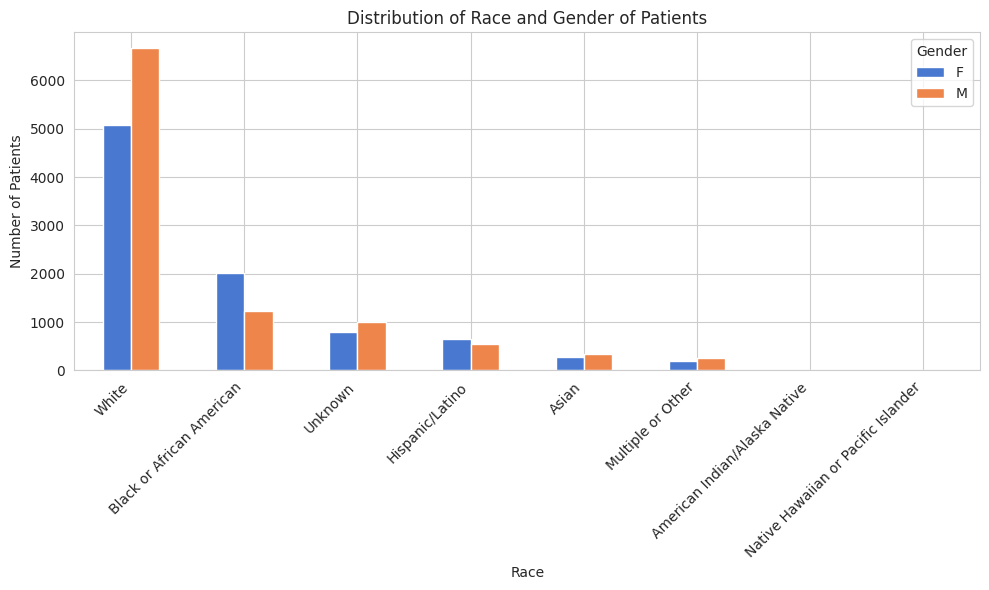

In [ ]:
# Plot the distribution of race and gender together in descending order
race_gender_counts = pi.groupby(['race_general', 'gender'])['patient_id'].nunique().unstack().fillna(0)
race_gender_counts_sorted = race_gender_counts.sort_values(['F', 'M'], ascending=[False, False])

plt.figure(figsize=(12, 6))
race_gender_counts_sorted.plot(kind='bar')
plt.title('Distribution of Race and Gender of Patients')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### The average admission by race and gender

<Figure size 1200x600 with 0 Axes>

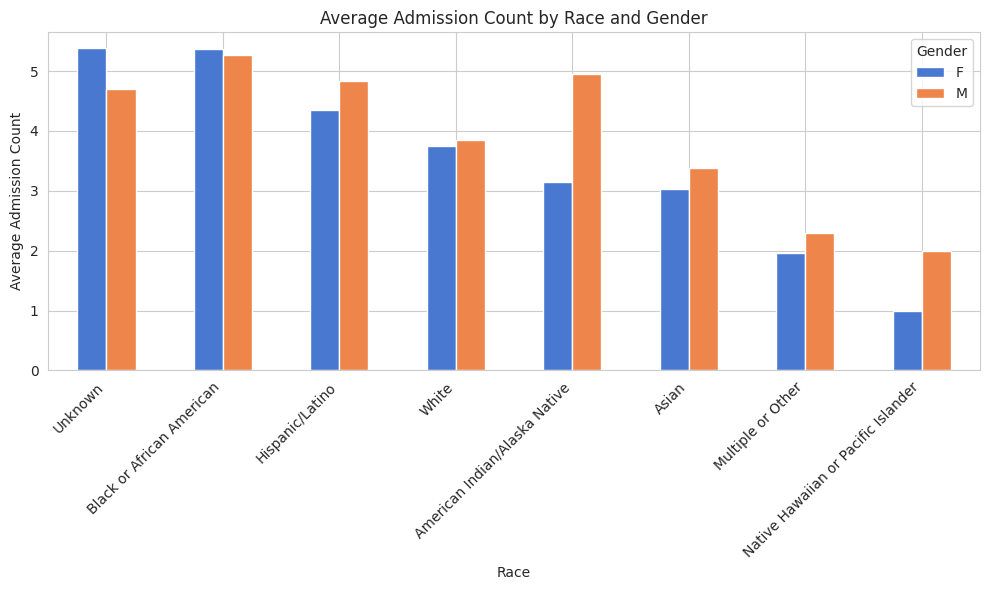

In [ ]:
#Count the corresponding admission_id for each patient_id and list their corresponding race group
patient_admission_race_gender= ad.groupby(['patient_id', 'race_general','gender'])['admission_id'].count().reset_index()

patient_admission_race_gender = patient_admission_race_gender.rename(columns={'admission_id': 'admission_count'})

average_admission_by_race_gender = patient_admission_race_gender.groupby(['race_general', 'gender'])['admission_count'].mean().unstack()
average_admission_by_race_gender_sorted = average_admission_by_race_gender.sort_values('F',ascending = False)

# Plot the average admission count for each race group by gender
plt.figure(figsize=(12, 6))
average_admission_by_race_gender_sorted.plot(kind='bar')
plt.title('Average Admission Count by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Average Admission Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## Age

### Plot the age distribution of patients at each admission

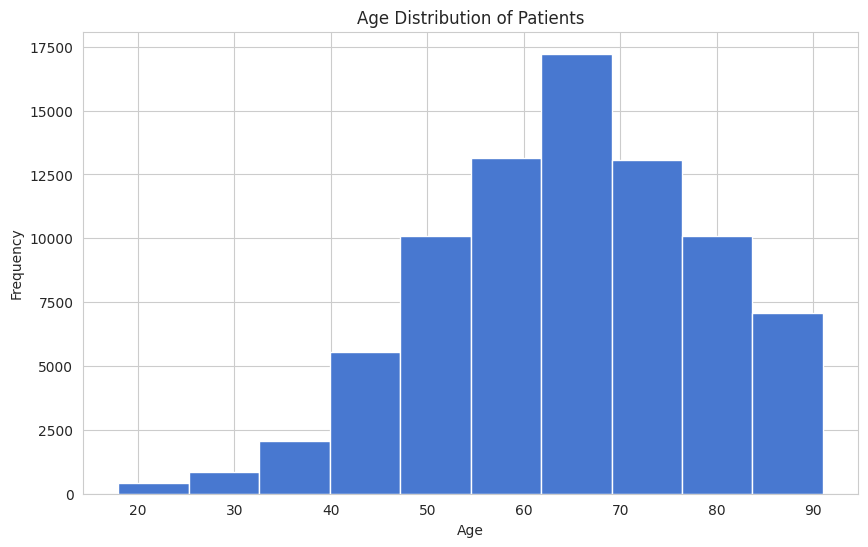

In [ ]:
# Plot the age distribution of patients at each admission
plt.figure(figsize=(10, 6))
plt.hist(ad['age_at_admission'], bins=10)  # Adjust bins as needed
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Average admission count by age

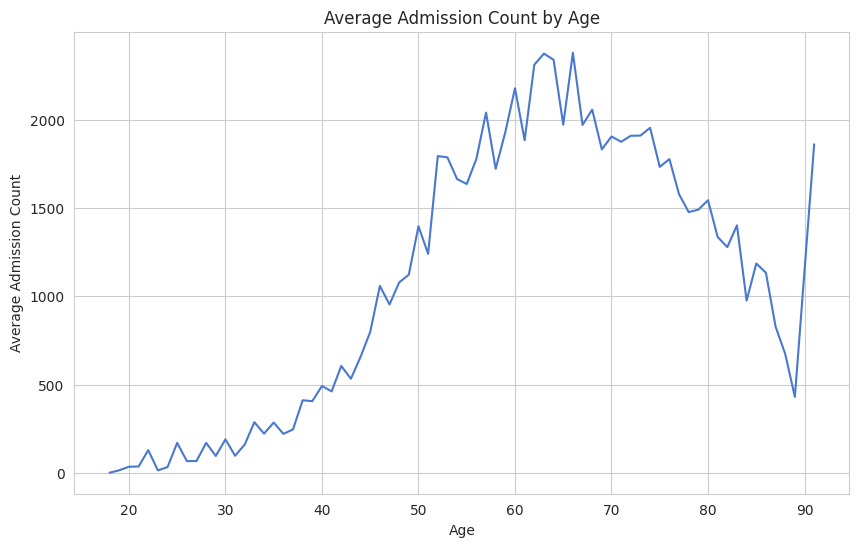

In [ ]:

# Calculate the average admission time for each age group
average_admission_by_age = ad.groupby('age_at_admission')['admission_id'].count().reset_index()
average_admission_by_age = average_admission_by_age.rename(columns={'admission_id': 'admission_count'})

# Plot the average admission time for each age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_at_admission', y='admission_count', data=average_admission_by_age)
plt.title('Average Admission Count by Age')
plt.xlabel('Age')
plt.ylabel('Average Admission Count')
plt.show()

### Readmission rate by age

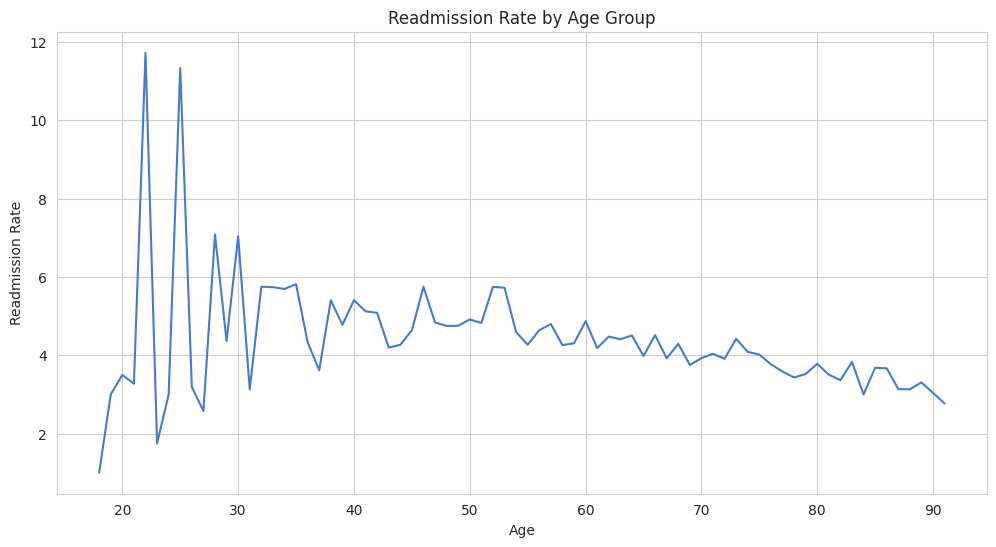

In [ ]:
# Calculate the number of patients admitted more than once for each age group
readmitted_patients_by_age = ad[ad['admission_id'] > 1].groupby('age_at_admission')['patient_id'].count()

# Calculate the total number of patients for each age group
total_patients_by_age = ad.groupby('age_at_admission')['patient_id'].nunique()

# Create a DataFrame to store the results
readmission_table_age = pd.DataFrame({
    'Number of Patients Admitted Over 1 Time': readmitted_patients_by_age,
    'Total Number of Patients': total_patients_by_age
})

# Calculate the readmission rate
readmission_table_age['Readmission Rate'] = readmission_table_age['Number of Patients Admitted Over 1 Time'] / readmission_table_age['Total Number of Patients']

# Plot the readmission rate by age group
plt.figure(figsize=(12, 6))
sns.lineplot(x=readmission_table_age.index, y=readmission_table_age['Readmission Rate'])
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age')
plt.ylabel('Readmission Rate')
plt.show()

## Admission Type

In [ ]:
import pandas as pd

In [ ]:
eda1_labId=pd.read_csv('/content/eda1_labId.csv')
eda1_labId

,patient_id,race_general,gender,insurance,admission_id,age_at_admission,admission_type,admission_location,lab_test_id,lab_test,test_value,test_unit
0,11339520,Black or African American,F,Medicare,20831386,27,DIRECT OBSERVATION,INTERNAL TRANSFER TO OR FROM PSYCH,50931,Glucose,194.0,mg/dL
1,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,91.0,mg/dL
2,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,95.0,mg/dL
3,11994880,White,F,Medicaid,20338485,39,AMBULATORY OBSERVATION,PROCEDURE SITE,50931,Glucose,96.0,mg/dL
4,11994880,White,F,Medicaid,26148078,39,DIRECT EMER.,PHYSICIAN REFERRAL,50931,Glucose,92.0,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...
963241,13238271,White,F,Medicaid,21014166,37,URGENT,PHYSICIAN REFERRAL,51222,Hemoglobin,13.6,g/dL
963242,13238271,White,F,Medicaid,21014166,37,URGENT,PHYSICIAN REFERRAL,51222,Hemoglobin,11.1,g/dL
963243,13238271,White,F,Medicaid,21014166,37,URGENT,PHYSICIAN REFERRAL,51222,Hemoglobin,13.8,g/dL
963244,15007743,White,M,Medicare,20730563,33,EU OBSERVATION,EMERGENCY ROOM,51222,Hemoglobin,16.0,g/dL


### Distribution of admission type

In [ ]:
import matplotlib.pyplot as plt

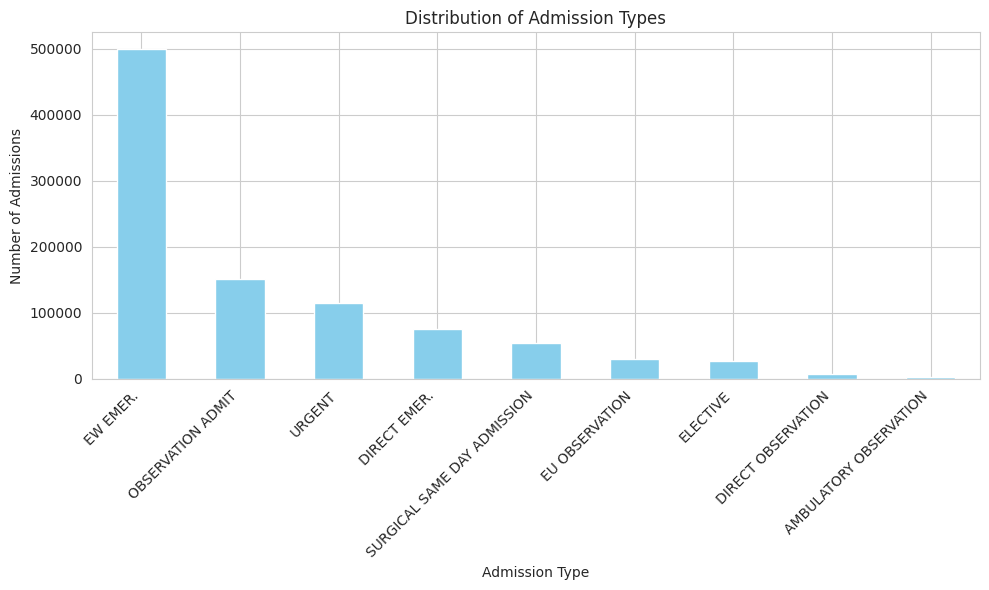

In [ ]:
admission_type_counts = eda1_labId['admission_type'].value_counts()

plt.figure(figsize=(10, 6))
admission_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


 The bar chart above shows the distribution of various admission types in the dataset. Based on the plot, we observe that:


  - Emergency Admissions: The majority of admissions are through the emergency department, which indicates that many type 2 diabetes patients who are admitted may experience serious and urgent situations and need immediate treatment. This aligns with the known risks and complications of diabetes.

  - Observation and Urgent Admissions: These types of admissions are also common, reflecting that many diabetes patients may be admitted due to urgent symptoms, but not necessarily life-threatening ones. These patients may need monitoring to assess their condition and decide if further treatment is needed, or they need interventions and treatment to prevent condition from worsening.

  - Same-Day Surgery and Elective Admissions represent planned admissions for surgeries or treatments scheduled in advance. Other observation and ambulatory admissions involve short-term monitoring, possibly for managing blood sugar levels or other complications. These admission types means the condition of patient is not uegent and don't need immediate treatment. However, these cases are not common, suggesting that most type 2 diabetes readmissions are due to urgent situations rather than planned care.

The distribution of admission types suggests that a significant portion of type 2 diabetes patients are being readmitted through emergency or urgent channels, likely due to critical conditions. Only a few are admitted for planned procedures or less severe cases.



### Distribution of patient ages at admission

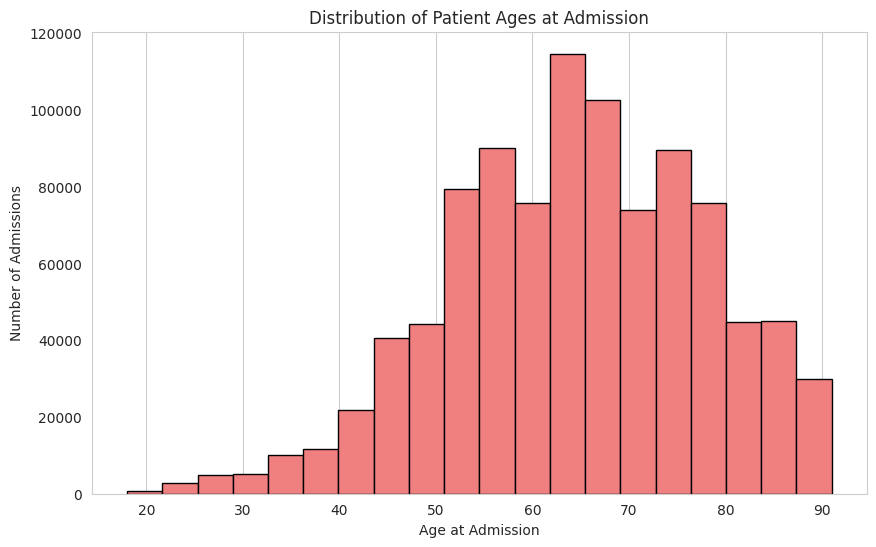

In [ ]:
# Plot the distribution of patient ages at admission
plt.figure(figsize=(10, 6))
eda1_labId['age_at_admission'].plot(kind='hist', bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Patient Ages at Admission')
plt.xlabel('Age at Admission')
plt.ylabel('Number of Admissions')
plt.grid(axis='y')

plt.show()

 From the chart showing distributions of age of admitted patients, we can see that:

  - The majority of admissions are for patients between 50 and 70 years old, with the peak around 60-70 years. This is expected since type 2 diabetes is more common in older adults, and complications often arise in this age group.

  - There are fewer admissions for younger patients (under40). While type 2 diabetes still occur in younger individuals, it is less frequent, and complications requiring hospitalization and readmission may be rarer in younger age group.

  - There were also very few admissions in the age group of 80 years and older. This reflects the lower likelihood of hospitalization of older patients, perhaps because of different methods of care (e.g., conservative treatment).

The data indicates that middle-aged to elderly patients (50-70 years old) are at the highest risk of readmission, likely due to diabetes-related complications. Healthcare interventions could aimed at reducing readmission particularly focus on this age group.


Glucose

In [ ]:
eda2_glucose = eda1_labId[eda1_labId['lab_test'] == 'Glucose']
eda2_glucose

,patient_id,race_general,gender,insurance,admission_id,age_at_admission,admission_type,admission_location,lab_test_id,lab_test,test_value,test_unit
0,11339520,Black or African American,F,Medicare,20831386,27,DIRECT OBSERVATION,INTERNAL TRANSFER TO OR FROM PSYCH,50931,Glucose,194.0,mg/dL
1,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,91.0,mg/dL
2,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,95.0,mg/dL
3,11994880,White,F,Medicaid,20338485,39,AMBULATORY OBSERVATION,PROCEDURE SITE,50931,Glucose,96.0,mg/dL
4,11994880,White,F,Medicaid,26148078,39,DIRECT EMER.,PHYSICIAN REFERRAL,50931,Glucose,92.0,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...
520412,15007743,White,M,Medicare,27657650,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,86.0,mg/dL
520413,15007743,White,M,Medicare,20730563,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,260.0,mg/dL
520414,15007743,White,M,Medicare,20730563,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,302.0,mg/dL
520415,15007743,White,M,Medicare,21643144,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,218.0,mg/dL


In [ ]:
glucose_tests = eda1_labId[eda1_labId['lab_test_id'].isin([50809, 50931])]
glucose_tests

,patient_id,race_general,gender,insurance,admission_id,age_at_admission,admission_type,admission_location,lab_test_id,lab_test,test_value,test_unit
0,11339520,Black or African American,F,Medicare,20831386,27,DIRECT OBSERVATION,INTERNAL TRANSFER TO OR FROM PSYCH,50931,Glucose,194.0,mg/dL
1,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,91.0,mg/dL
2,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,95.0,mg/dL
3,11994880,White,F,Medicaid,20338485,39,AMBULATORY OBSERVATION,PROCEDURE SITE,50931,Glucose,96.0,mg/dL
4,11994880,White,F,Medicaid,26148078,39,DIRECT EMER.,PHYSICIAN REFERRAL,50931,Glucose,92.0,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...
520412,15007743,White,M,Medicare,27657650,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,86.0,mg/dL
520413,15007743,White,M,Medicare,20730563,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,260.0,mg/dL
520414,15007743,White,M,Medicare,20730563,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,302.0,mg/dL
520415,15007743,White,M,Medicare,21643144,33,EU OBSERVATION,EMERGENCY ROOM,50931,Glucose,218.0,mg/dL


## Glucose

### Distribution of glucose test methods (blood test vs. fingerstick)

Explore two ways of glucose test

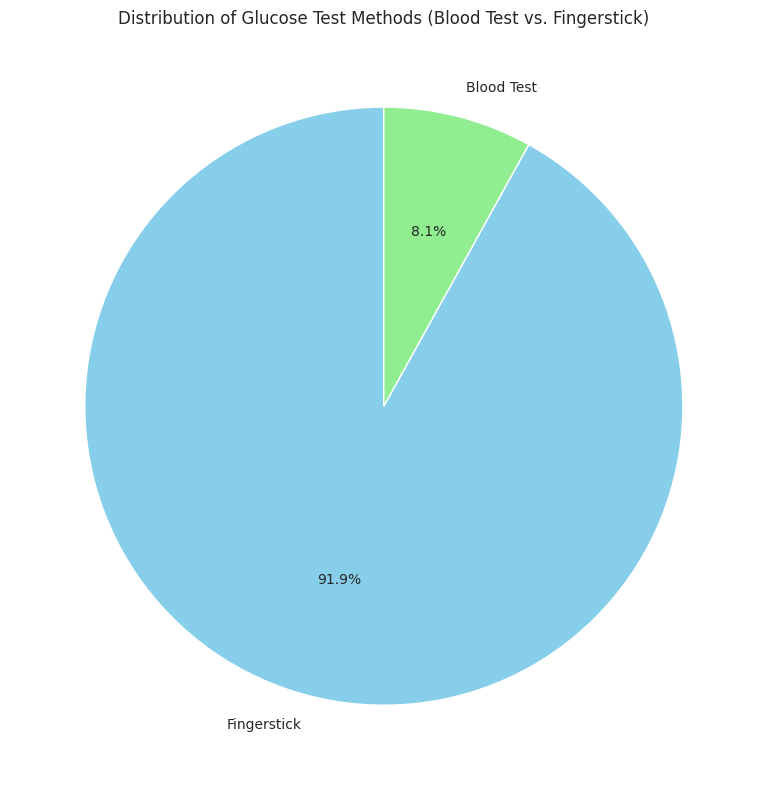

In [ ]:
plt.figure(figsize=(8, 8))
glucose_test_counts = glucose_tests['lab_test_id'].replace({50809: 'Blood Test', 50931: 'Fingerstick'}).value_counts()

glucose_test_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Glucose Test Methods (Blood Test vs. Fingerstick)')
plt.ylabel('')
plt.tight_layout()
plt.show()

The pie chart shows the distribution of glucose testing methods used for patients.

  - Fingerstick is overwhelmingly more common, with a large majority of tests being conducted via fingerstick.

  - Blood lab test are relatively fewer compared to fingerstick. Blood tests are more accurate but may take more time to process and are typically used for more detailed assessments of a patient's glucose levels.


The high frequency of fingerstick tests reflects the need for rapid glucose monitoring in hospitalized patients, which is likely due to the urgent management of diabetes-related complications. Blood tests, while less frequent, may be used for more comprehensive glucose level monitoring, especially for diagnosis or when more precise data is required.



Explore more about test values

### Average glucose test values (blood test vs. fingerstick)

In [ ]:
# Filter the glucose test values by method
blood_test_values = glucose_tests[glucose_tests['lab_test_id'] == 50809]['test_value']
fingerstick_test_values = glucose_tests[glucose_tests['lab_test_id'] == 50931]['test_value']

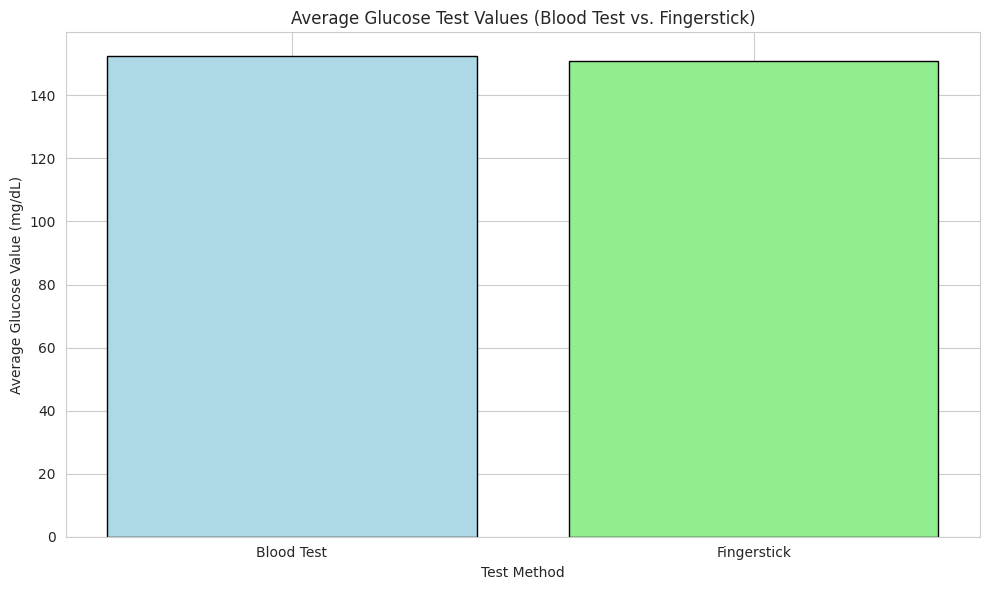

In [ ]:
mean_blood_test_value = blood_test_values.mean()
mean_fingerstick_test_value = fingerstick_test_values.mean()

mean_blood_test_value, mean_fingerstick_test_value

plt.figure(figsize=(10, 6))
methods = ['Blood Test', 'Fingerstick']
mean_values = [mean_blood_test_value, mean_fingerstick_test_value]
plt.bar(methods, mean_values, color=['lightblue', 'lightgreen'], edgecolor='black')
plt.title('Average Glucose Test Values (Blood Test vs. Fingerstick)')
plt.xlabel('Test Method')
plt.ylabel('Average Glucose Value (mg/dL)')

plt.tight_layout()
plt.show()

The histogram shows the average glucose test values for both blood tests and fingerstick measurements. It shows there is no big different in test results for both methods.

### Average glucose text values by admission type

The average glucose test values by admission type with values on top of bars

In [ ]:
mean_glucose_by_admission = glucose_tests.groupby('admission_type')['test_value'].mean()
plt.figure(figsize=(12, 6))
bars = mean_glucose_by_admission.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Average Glucose Test Values by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Average Glucose Value (mg/dL)')
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

- The average glucose values across all admission types are quite consistent. This suggests that patients across all types of admissions—whether emergency, observation, or elective—tend to have relatively similar high blood glucose levels on average when tested.

- Interestingly, urgent admissions do not show drastically higher glucose values, which suggests that not all emergency admissions for diabetes patients are directly related to extremely high glucose levels.

Conclusion:
The similarity in glucose levels across admission types may suggest that glucose-related complications occur uniformly across different medical situations, and not just in emergency contexts.



### Average glucose test values by gender

explore gender and glucose value

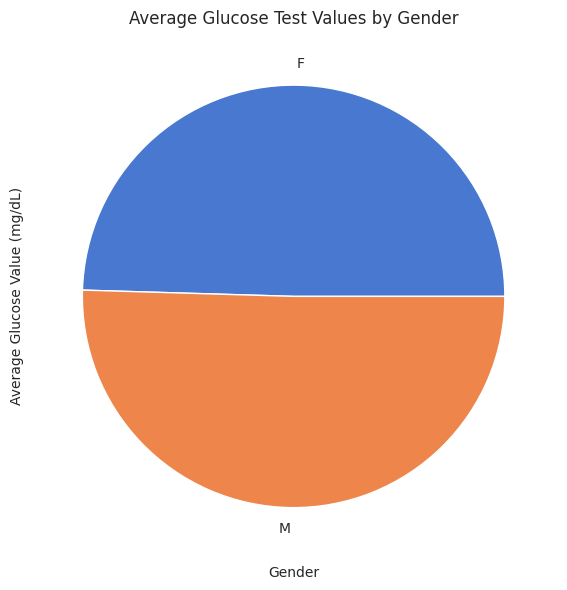

In [ ]:
mean_glucose_by_gender = glucose_tests.groupby('gender')['test_value'].mean()

plt.figure(figsize=(8, 6))
mean_glucose_by_gender.plot(kind='pie', color=['lightblue', 'lightpink'])

plt.title('Average Glucose Test Values by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Glucose Value (mg/dL)')
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


This pie chart shows the average blood glucose values for male (M) and female (F) patients:

  - The average blood glucose values for males are slightly higher than for females, but the difference is very slight.
  - The average blood glucose values for females are not very different from those of males, and both values are very close to each other.

According to this graph, gender does not show a significant difference in the blood glucose levels of diabetics. The average blood glucose values are relatively consistent for both males and females. This suggests that gender may not be a critical factor in influencing blood glucose levels when it comes to diabetes readmission.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/eda1_labId.csv')

In [ ]:
data.shape

(963246, 12)

In [ ]:
data.head(7)

,patient_id,race_general,gender,insurance,admission_id,age_at_admission,admission_type,admission_location,lab_test_id,lab_test,test_value,test_unit
0,11339520,Black or African American,F,Medicare,20831386,27,DIRECT OBSERVATION,INTERNAL TRANSFER TO OR FROM PSYCH,50931,Glucose,194.0,mg/dL
1,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,91.0,mg/dL
2,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,95.0,mg/dL
3,11994880,White,F,Medicaid,20338485,39,AMBULATORY OBSERVATION,PROCEDURE SITE,50931,Glucose,96.0,mg/dL
4,11994880,White,F,Medicaid,26148078,39,DIRECT EMER.,PHYSICIAN REFERRAL,50931,Glucose,92.0,mg/dL
5,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,81.0,mg/dL
6,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,106.0,mg/dL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963246 entries, 0 to 963245
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   patient_id          963246 non-null  int64  
 1   race_general        963246 non-null  object 
 2   gender              963246 non-null  object 
 3   insurance           963246 non-null  object 
 4   admission_id        963246 non-null  int64  
 5   age_at_admission    963246 non-null  int64  
 6   admission_type      963246 non-null  object 
 7   admission_location  963246 non-null  object 
 8   lab_test_id         963246 non-null  int64  
 9   lab_test            963246 non-null  object 
 10  test_value          963246 non-null  float64
 11  test_unit           963246 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 88.2+ MB


##Insurance

In [ ]:
data.insurance.isnull().sum()

0

In [ ]:
data.insurance.unique()

array(['Medicare', 'Private', 'Medicaid', 'Other', 'No charge'],
      dtype=object)

We can see for there are 5 tyypes of insurance.
1. Medicare
2. Private
3. Medicaid
4. Other
5. No charge (Pstient was not charged)

### 1. How many unique patients are there for each insurance type?

In [ ]:
# Count unique patients by insurance type
unique_patients_by_insurance = data.groupby('insurance')['patient_id'].nunique().reset_index()
unique_patients_by_insurance.columns = ['insurance', 'unique_patient_count']
unique_patients_by_insurance.head(5)

,insurance,unique_patient_count
0,Medicaid,3255
1,Medicare,12914
2,No charge,12
3,Other,649
4,Private,5240


We can see that majority of the diabetic patients has the medicare insurance type. Now, let us visualize it.

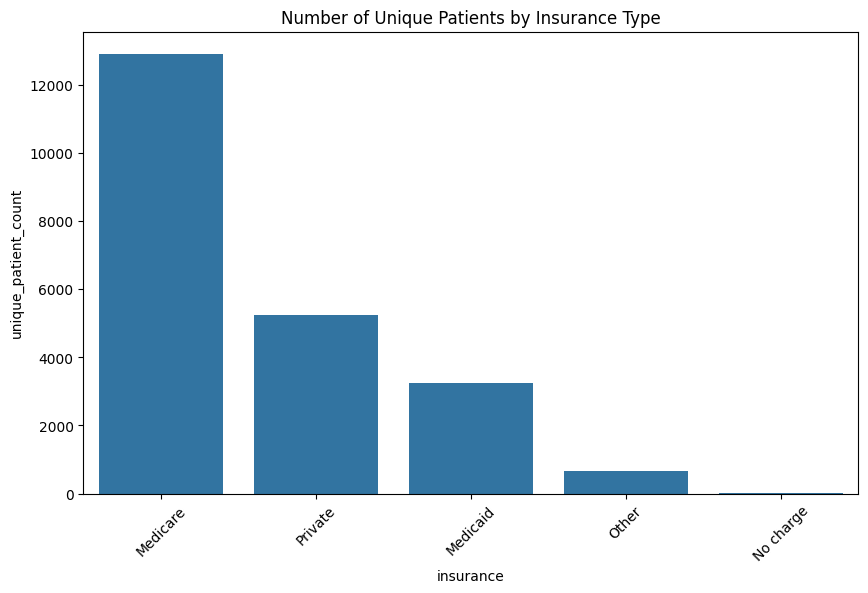

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_patients_by_insurance, x='insurance', y='unique_patient_count', order=df['insurance'].value_counts().index)
plt.title('Number of Unique Patients by Insurance Type')
plt.xticks(rotation=45)
plt.show()

The visualisation above suggests that Medicare covers the largest group of unique patients, indicating its widespread use compared to other insurance types.
* Medicare has the highest number of unique patients, exceeding 12,000.
* Private insurance follows, with a significant but lower count than Medicare.
* Medicaid has fewer unique patients than both Medicare and Private insurance.
* Other types of insurance have a small number of unique patients.
* There are very few number of patients that were not chared at all.


### 2. What is the distribution of multiple admissions per patient by insurance type?

In [ ]:
# Distribution of multiple admissions per patient by insurance type
admissions_per_patient = data.groupby(['patient_id', 'insurance'])['admission_id'].nunique().reset_index()
admissions_per_patient.columns = ['patient_id', 'insurance', 'admission_count']
admissions_per_patient.head(5)


,patient_id,insurance,admission_count
0,10000980,Medicare,7
1,10001176,Medicare,1
2,10001877,Medicare,2
3,10002013,Medicaid,10
4,10002013,Medicare,5


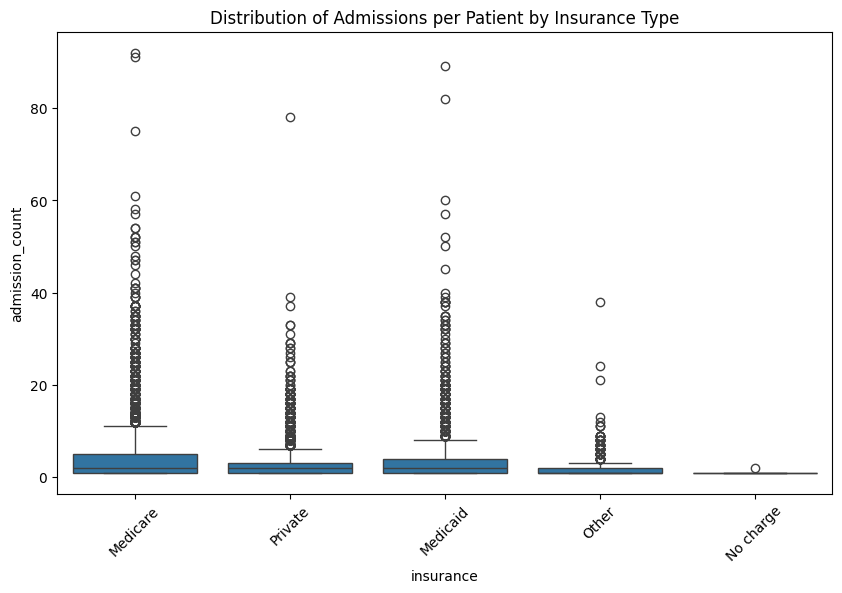

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=admissions_per_patient, x='insurance', y='admission_count', order=data['insurance'].value_counts().index)
plt.title('Distribution of Admissions per Patient by Insurance Type')
plt.xticks(rotation=45)
plt.show()

* Medicare, Private, and Medicaid show a wide range of admissions per patient, with many outliers suggesting some patients have a significantly higher number of admissions.
* Other and No charge categories have fewer admissions, with fewer outliers.



### Re-admission Rates by Insurance Type

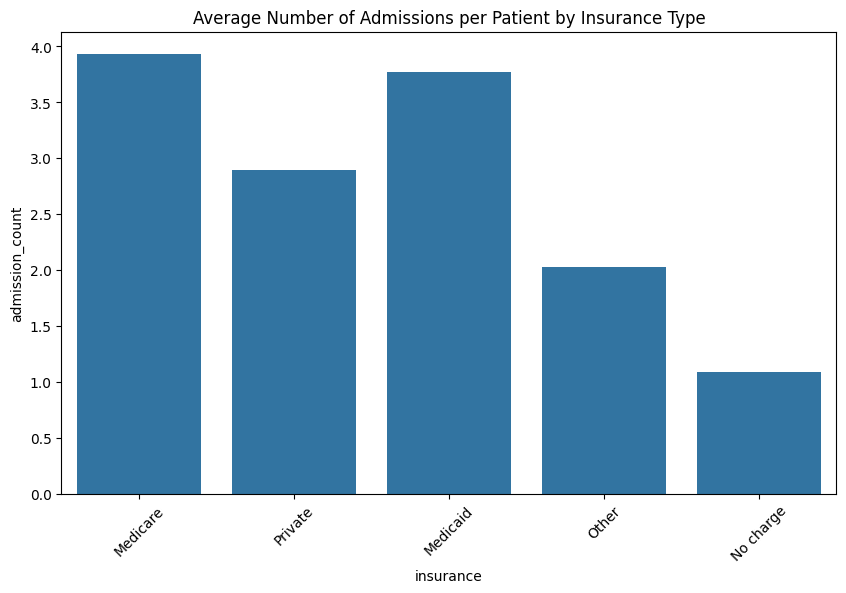

In [ ]:

# Now calculate the average number of admissions per patient for each insurance type
avg_admissions_per_insurance = admissions_per_patient.groupby('insurance')['admission_count'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_admissions_per_insurance, x='insurance', y='admission_count', order=data['insurance'].value_counts().index)
plt.title('Average Number of Admissions per Patient by Insurance Type')
plt.xticks(rotation=45)
plt.show()


* Medicare covers the largest group of unique patients and shows a wide variability in the number of admissions per patient.
* Both Private insurance and Medicaid also cover significant numbers but with varying admission patterns.

### 3. How does the distribution of gender and race look for unique patients under each insurance type?

In [ ]:
unique_patient_data = data.drop_duplicates(subset=['patient_id'])
unique_patient_data.shape

(19111, 12)

In [ ]:
unique_patient_data.head(5)

,patient_id,race_general,gender,insurance,admission_id,age_at_admission,admission_type,admission_location,lab_test_id,lab_test,test_value,test_unit
0,11339520,Black or African American,F,Medicare,20831386,27,DIRECT OBSERVATION,INTERNAL TRANSFER TO OR FROM PSYCH,50931,Glucose,194.0,mg/dL
1,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,50931,Glucose,91.0,mg/dL
10,17631232,White,M,Private,21754272,54,EW EMER.,EMERGENCY ROOM,50931,Glucose,241.0,mg/dL
19,14027008,White,F,Private,25784711,66,EW EMER.,EMERGENCY ROOM,50931,Glucose,97.0,mg/dL
23,17959424,Black or African American,F,Private,24361040,53,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,50931,Glucose,131.0,mg/dL


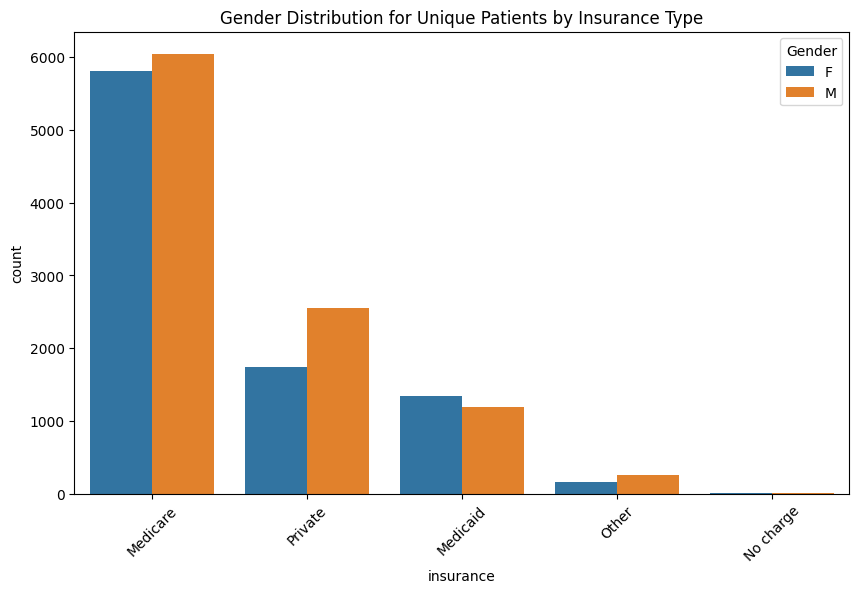

In [ ]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=unique_patient_data, x='insurance', hue='gender', order=data['insurance'].value_counts().index)
plt.title('Gender Distribution for Unique Patients by Insurance Type')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

WE can see from the distribution that for medicare, private and other insurance type has more male diabetic patients compared to female patients.

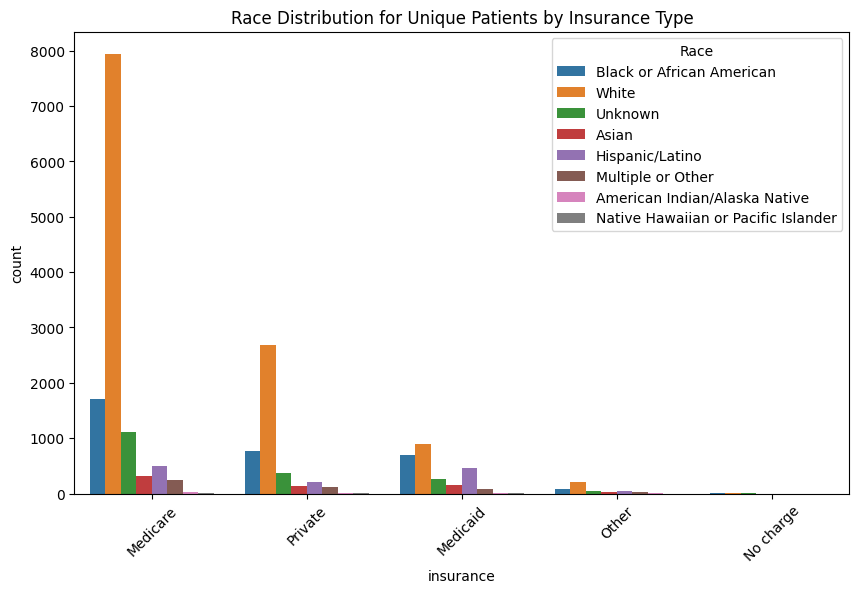

In [ ]:
# Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=unique_patient_data, x='insurance', hue='race_general', order=data['insurance'].value_counts().index)
plt.title('Race Distribution for Unique Patients by Insurance Type')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()


White is the most common race for the diabetic patients across different insurance types.

### 5. What is the percentage of people whose insurance changed?

In [ ]:
# Sort aby patient_id and admission_id
df = data.sort_values(['patient_id', 'admission_id'])

# Group by patient_id and get insurance types for each admission
patient_insurance = df.groupby('patient_id').agg({
    'insurance': list,
    'admission_id': list,
    'age_at_admission': 'first'  # Assuming age doesn't change significantly across admissions
}).reset_index()

In [ ]:
patient_insurance.head(5)

,patient_id,insurance,admission_id,age_at_admission
0,10000980,"[Medicare, Medicare, Medicare, Medicare, Medic...","[20897796, 20897796, 20897796, 20897796, 20897...",73
1,10001176,"[Medicare, Medicare, Medicare, Medicare, Medic...","[23334588, 23334588, 23334588, 23334588, 23334...",64
2,10001877,"[Medicare, Medicare, Medicare, Medicare, Medic...","[21320596, 21320596, 25679292, 25679292, 25679...",89
3,10002013,"[Medicaid, Medicaid, Medicaid, Medicaid, Medic...","[21516558, 21516558, 21516558, 21516558, 21516...",53
4,10002976,"[Medicare, Medicare, Medicare, Medicare, Medic...","[21640325, 21640325, 21640325, 21640325, 21640...",70


In [ ]:
# Function to count insurance changes
def count_insurance_changes(insurance_list):
    changes = 0
    for i in range(1, len(insurance_list)):
        if insurance_list[i] != insurance_list[i-1]:
            changes += 1
    return changes

# Apply the function to count changes
patient_insurance['insurance_changes'] = patient_insurance['insurance'].apply(count_insurance_changes)

# Calculate percentage of patients with insurance changes
total_patients = len(patient_insurance)
patients_with_changes = sum(patient_insurance['insurance_changes'] > 0)
percent_with_changes = (patients_with_changes / total_patients) * 100

In [ ]:
print("Nummber of patients with insurance changes:", patients_with_changes)
print(f"Percentage of patients with insurance changes: {percent_with_changes:.2f}%")

Nummber of patients with insurance changes: 2729
Percentage of patients with insurance changes: 14.28%


We can see fromt the output that throughout the medical journe there have been instances where there was a change in insurance type.

### What is the most common admission type by insurance category?

In [ ]:
# Group by insurance and admission_type, and count the occurrences of each combination
admission_counts = data.groupby(['insurance', 'admission_type']).size().reset_index(name='count')

# Sort the values by insurance and count, in descending order, to get the most common admission type at the top
admission_counts_sorted = admission_counts.sort_values(['insurance', 'count'], ascending=[True, False])

# Now get the most common admission type for each insurance category
most_common_admission_type = admission_counts_sorted.groupby('insurance').first().reset_index()

# Display the result
print(most_common_admission_type)


   insurance admission_type   count
0   Medicaid       EW EMER.   70704
1   Medicare       EW EMER.  328164
2  No charge       ELECTIVE     103
3      Other       EW EMER.    8796
4    Private       EW EMER.   91868


WE can see that EW emergengency is the most common admission type for people with all the insurance types except people with no charge

### What is the average test value across different insurance types?

It could help in evaluating if certain insurance types are associated with higher or lower average lab test values, potentially indicating different healthcare outcomes or treatments.

In [ ]:
# Filter the dataset for Glucose and Hemoglobin tests
filtered_df = data[data['lab_test'].isin(['Glucose', 'Hemoglobin'])]

# Group by insurance and lab_test, then calculate the average test value
avg_test_value_by_insurance = filtered_df.groupby(['insurance', 'lab_test'])['test_value'].mean().reset_index()

# Rename the columns
avg_test_value_by_insurance.columns = ['insurance', 'lab_test', 'average_test_value']

avg_test_value_by_insurance.head(5)

,insurance,lab_test,average_test_value
0,Medicaid,Glucose,157.122009
1,Medicaid,Hemoglobin,10.153636
2,Medicare,Glucose,149.272625
3,Medicare,Hemoglobin,9.954721
4,No charge,Glucose,148.221311


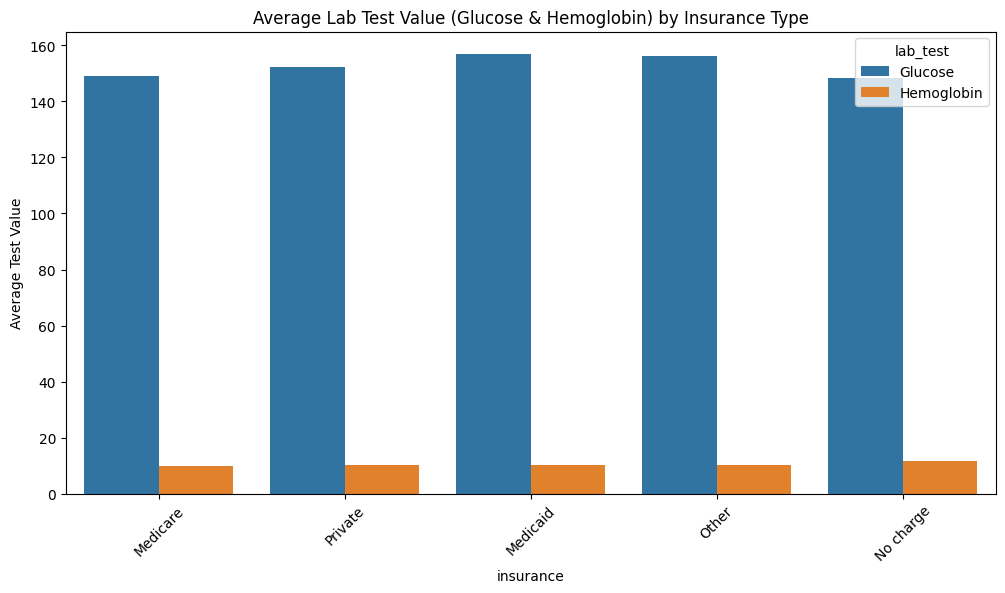

In [ ]:
# Plot the average test value by insurance type and lab test
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_test_value_by_insurance, x='insurance', y='average_test_value', hue='lab_test', order=data['insurance'].value_counts().index)
plt.title('Average Lab Test Value (Glucose & Hemoglobin) by Insurance Type')
plt.xticks(rotation=45)
plt.ylabel('Average Test Value')
plt.show()


### What is the frequency of lab tests by insurance type?

In [ ]:
# Group by insurance and lab_test, then count the frequency of lab tests
lab_test_frequency = df.groupby(['insurance', 'lab_test']).size().reset_index(name='frequency')

# Display the frequency table
print(lab_test_frequency)


   insurance    lab_test  frequency
0   Medicaid     Glucose      73585
1   Medicaid  Hemoglobin      63342
2   Medicare     Glucose     338909
3   Medicare  Hemoglobin     288424
4  No charge     Glucose        122
5  No charge  Hemoglobin         22
6      Other     Glucose       8553
7      Other  Hemoglobin       7519
8    Private     Glucose      99248
9    Private  Hemoglobin      83522


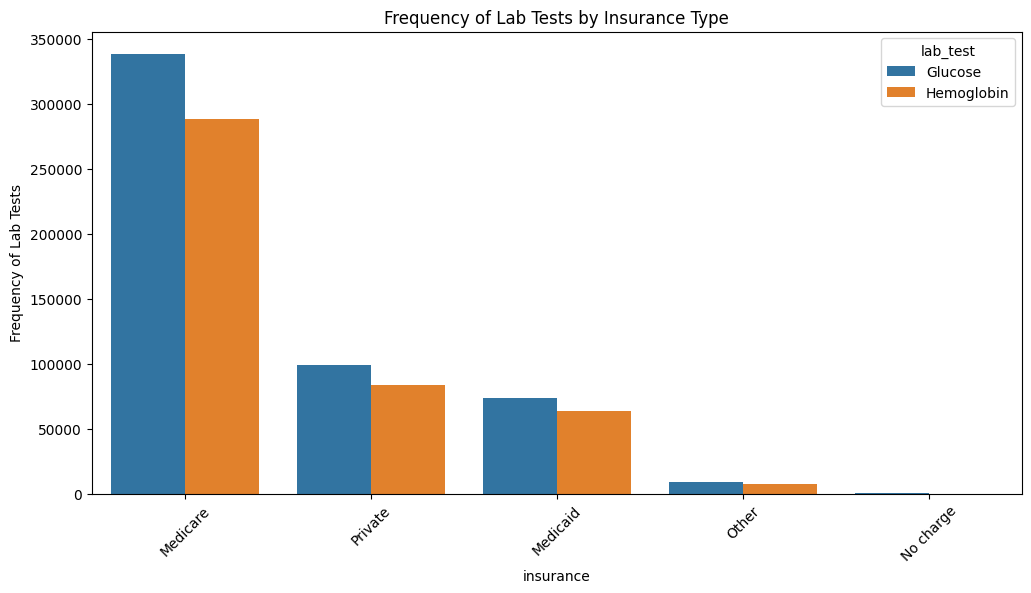

In [ ]:
# Plotting the frequency of lab tests by insurance type
plt.figure(figsize=(12, 6))
sns.barplot(data=lab_test_frequency, x='insurance', y='frequency', hue='lab_test', order=df['insurance'].value_counts().index)
plt.title('Frequency of Lab Tests by Insurance Type')
plt.xticks(rotation=45)
plt.ylabel('Frequency of Lab Tests')
plt.show()

WE can see that patients with medicare isnurance had done the highest number of lab tests for both hemoglobin and insurance.

In [ ]:
# Filter the dataset for Hemoglobin lab tests
hemoglobin_data = data[data['lab_test'] == 'Hemoglobin']
hemoglobin_data.shape

(442829, 12)

In [ ]:
hemoglobin_data.head(5)

,patient_id,race_general,gender,insurance,admission_id,age_at_admission,admission_type,admission_location,lab_test_id,lab_test,test_value,test_unit
520417,11339520,Black or African American,F,Medicare,20831386,27,DIRECT OBSERVATION,INTERNAL TRANSFER TO OR FROM PSYCH,51222,Hemoglobin,13.8,g/dL
520418,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,51222,Hemoglobin,9.9,g/dL
520419,11994880,White,F,Private,29170097,39,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,51222,Hemoglobin,10.7,g/dL
520420,11994880,White,F,Medicaid,27364110,39,DIRECT OBSERVATION,PHYSICIAN REFERRAL,51222,Hemoglobin,8.3,g/dL
520421,11994880,White,F,Medicaid,20338485,39,AMBULATORY OBSERVATION,PROCEDURE SITE,51222,Hemoglobin,11.2,g/dL


In [ ]:
hemoglobin_data.test_value.min()

2.2

In [ ]:
hemoglobin_data.test_value.max()

20.6

2.2  is the lowest recorded hemoglobin value of a patient and 20.6 beign the hgihest.

## Homoglobin

### What is the average hemoglobin level across different insurance types?

This will help identify whether patients with certain insurance types have higher or lower average hemoglobin levels, potentially indicating differences in patient populations or healthcare quality.

In [ ]:
# Group by insurance and calculate the average hemoglobin level
avg_hemoglobin_by_insurance = hemoglobin_data.groupby('insurance')['test_value'].mean().reset_index()

# Display the result
print(avg_hemoglobin_by_insurance)

   insurance  test_value
0   Medicaid   10.153636
1   Medicare    9.954721
2  No charge   11.568182
3      Other   10.343676
4    Private   10.228534


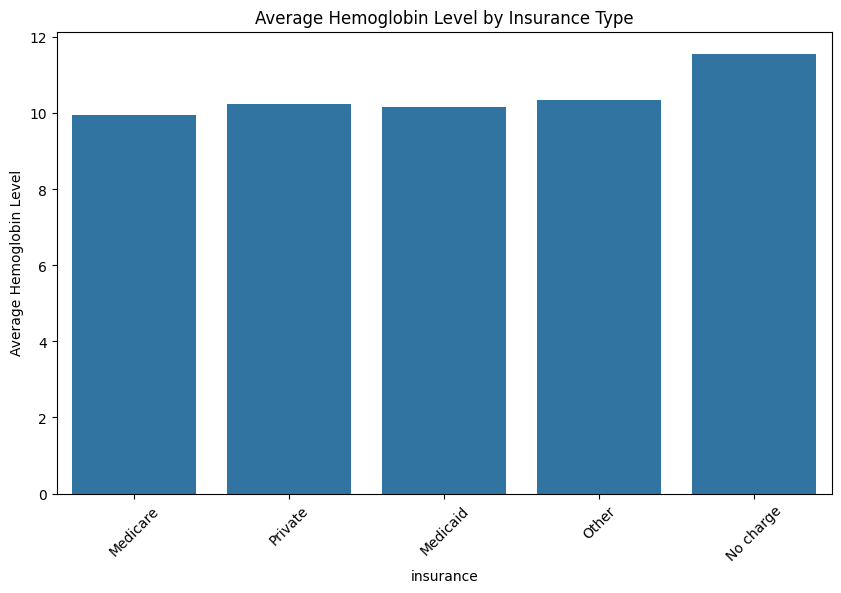

In [ ]:
# Plot the result
plt.figure(figsize=(10,6))
sns.barplot(data=avg_hemoglobin_by_insurance, x='insurance', y='test_value', order=data['insurance'].value_counts().index)
plt.title('Average Hemoglobin Level by Insurance Type')
plt.xticks(rotation=45)
plt.ylabel('Average Hemoglobin Level')
plt.show()

We can see that for diabetic patient with medicare insurance has the lowest hemoglobin of 9.9 and patients who were not charged had the highest hemoglobin of 11.5

### Diabetic patients Hemoglobin Levels by Gender

  gender  test_value
0      F    9.845908
1      M   10.207364


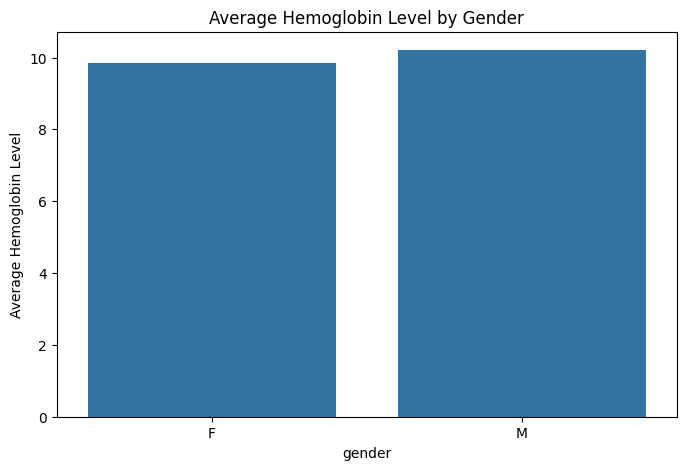

In [ ]:
# Group by gender and calculate the average hemoglobin level
avg_hemoglobin_by_gender = hemoglobin_data.groupby('gender')['test_value'].mean().reset_index()

# Display the result
print(avg_hemoglobin_by_gender)

# Plot the result
plt.figure(figsize=(8,5))
sns.barplot(data=avg_hemoglobin_by_gender, x='gender', y='test_value')
plt.title('Average Hemoglobin Level by Gender')
plt.ylabel('Average Hemoglobin Level')
plt.show()


We can see that female diabetic patient has an average hemoglobin value of 9.8 and male diabetic patient has an avergae value of 10.20. For both the genders, the hemoglobin value is very low in comparison to the standard value.

### Is There a Correlation Between Age and Hemoglobin Levels for diabetic patients?

This will help understand if certain demographic groups are more likely to have abnormal hemoglobin levels, which could be important for healthcare providers.

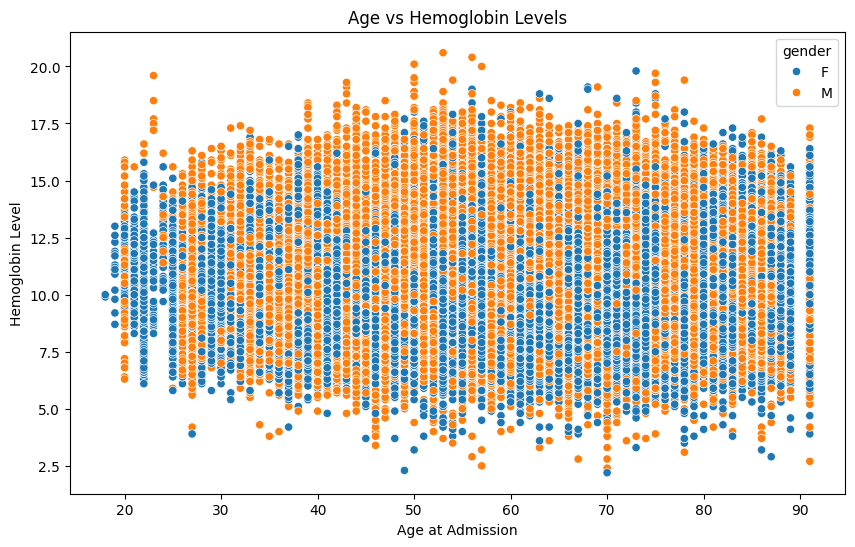

In [ ]:
# Plot age vs hemoglobin levels to see if there's a trend
plt.figure(figsize=(10,6))
sns.scatterplot(data=hemoglobin_data, x='age_at_admission', y='test_value', hue='gender')
plt.title('Age vs Hemoglobin Levels')
plt.xlabel('Age at Admission')
plt.ylabel('Hemoglobin Level')
plt.show()


### What percentage of patients have abnormal hemoglobin levels (high/low) across different insurance types?

In [ ]:
# Define hemoglobin thresholds
low_hemoglobin_threshold = 12
high_hemoglobin_threshold = 17.5

# Flag abnormal values
hemoglobin_data['abnormal_hemoglobin'] = (hemoglobin_data['test_value'] < low_hemoglobin_threshold) | (hemoglobin_data['test_value'] > high_hemoglobin_threshold)

# Group by insurance and calculate the percentage of abnormal hemoglobin values
abnormal_hemoglobin_by_insurance = hemoglobin_data.groupby('insurance')['abnormal_hemoglobin'].mean().reset_index()
abnormal_hemoglobin_by_insurance['abnormal_hemoglobin'] = abnormal_hemoglobin_by_insurance['abnormal_hemoglobin'] * 100

# Display the result
print(abnormal_hemoglobin_by_insurance)

   insurance  abnormal_hemoglobin
0   Medicaid            80.188501
1   Medicare            84.850082
2  No charge            50.000000
3      Other            77.576805
4    Private            79.379086


<ipython-input-135-c06a3a40e431>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemoglobin_data['abnormal_hemoglobin'] = (hemoglobin_data['test_value'] < low_hemoglobin_threshold) | (hemoglobin_data['test_value'] > high_hemoglobin_threshold)


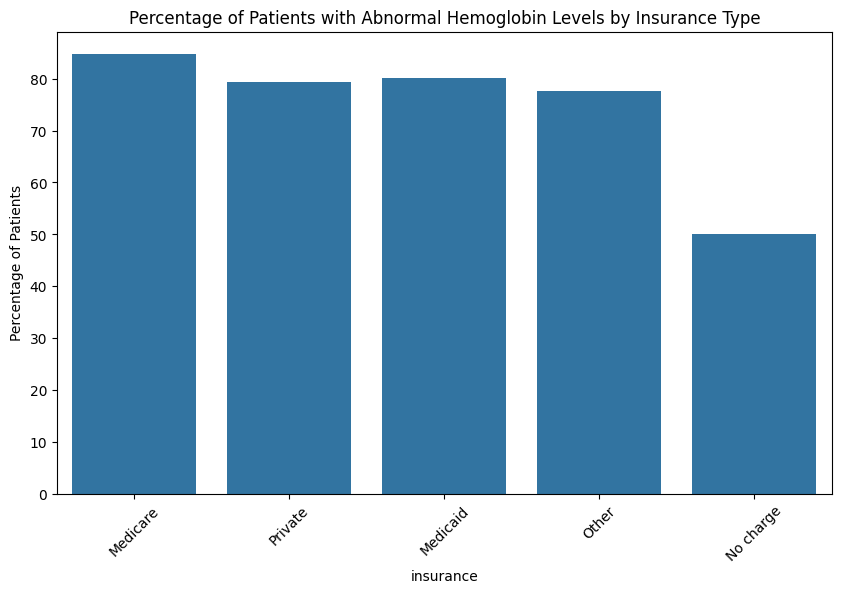

In [ ]:
# Plot the result
plt.figure(figsize=(10,6))
sns.barplot(data=abnormal_hemoglobin_by_insurance, x='insurance', y='abnormal_hemoglobin', order=data['insurance'].value_counts().index)
plt.title('Percentage of Patients with Abnormal Hemoglobin Levels by Insurance Type')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Patients')
plt.show()

### What is the distribution of Hemoglobin Levels by Admission Type?

                                count       mean       std  min   25%   50%  \
admission_type                                                                
AMBULATORY OBSERVATION         1157.0  11.504494  1.814755  6.4  10.3  11.4   
DIRECT EMER.                  34773.0   9.827596  1.834386  2.3   8.5   9.6   
DIRECT OBSERVATION             3719.0  11.169777  1.921194  5.3   9.8  11.1   
ELECTIVE                      11625.0   9.938331  1.724921  2.4   8.7   9.8   
EU OBSERVATION                14607.0  11.423119  1.904236  4.7  10.1  11.4   
EW EMER.                     231482.0  10.099378  1.945067  2.2   8.6   9.9   
OBSERVATION ADMIT             70355.0   9.762873  1.996872  2.8   8.2   9.5   
SURGICAL SAME DAY ADMISSION   23766.0   9.982458  1.658161  3.7   8.8   9.8   
URGENT                        51345.0   9.850176  1.859633  2.9   8.5   9.6   

                              75%   max  
admission_type                           
AMBULATORY OBSERVATION       12.7  17.5  
DIRE

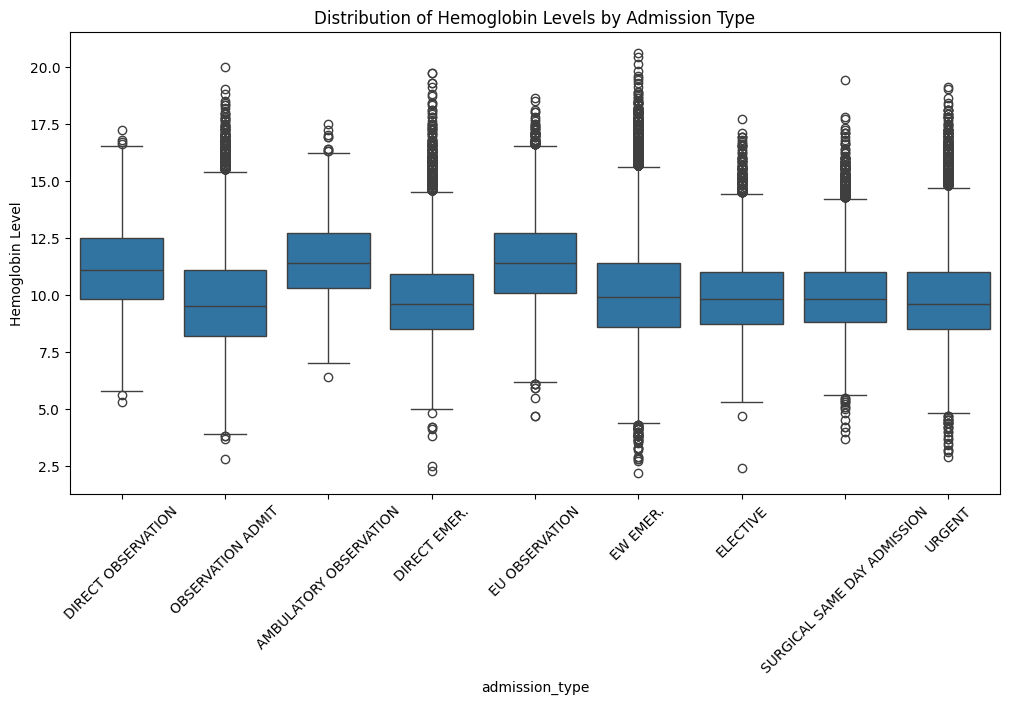

In [ ]:
# Group by admission_type and calculate basic statistics (mean, median, etc.)
hemoglobin_by_admission_type = hemoglobin_data.groupby('admission_type')['test_value'].describe()

# Display the statistics
print(hemoglobin_by_admission_type)

# Plot the distribution of hemoglobin levels by admission type
plt.figure(figsize=(12,6))
sns.boxplot(data=hemoglobin_data, x='admission_type', y='test_value')
plt.title('Distribution of Hemoglobin Levels by Admission Type')
plt.xticks(rotation=45)
plt.ylabel('Hemoglobin Level')
plt.show()
